In [1]:
import torch 
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

import numpy as np
import pandas as pd 
import os
import h5py

In [2]:
root = "./Dataset/BraTS2020_training_data/content/data"

In [3]:
h5_files = [f for f in os.listdir(root) if f.endswith('.h5')]
print(f"Found {len(h5_files)} .h5 files:\nExample file names:{h5_files[:3]}")

Found 57195 .h5 files:
Example file names:['volume_100_slice_0.h5', 'volume_100_slice_1.h5', 'volume_100_slice_10.h5']


In [4]:
h5_files

['volume_100_slice_0.h5',
 'volume_100_slice_1.h5',
 'volume_100_slice_10.h5',
 'volume_100_slice_100.h5',
 'volume_100_slice_101.h5',
 'volume_100_slice_102.h5',
 'volume_100_slice_103.h5',
 'volume_100_slice_104.h5',
 'volume_100_slice_105.h5',
 'volume_100_slice_106.h5',
 'volume_100_slice_107.h5',
 'volume_100_slice_108.h5',
 'volume_100_slice_109.h5',
 'volume_100_slice_11.h5',
 'volume_100_slice_110.h5',
 'volume_100_slice_111.h5',
 'volume_100_slice_112.h5',
 'volume_100_slice_113.h5',
 'volume_100_slice_114.h5',
 'volume_100_slice_115.h5',
 'volume_100_slice_116.h5',
 'volume_100_slice_117.h5',
 'volume_100_slice_118.h5',
 'volume_100_slice_119.h5',
 'volume_100_slice_12.h5',
 'volume_100_slice_120.h5',
 'volume_100_slice_121.h5',
 'volume_100_slice_122.h5',
 'volume_100_slice_123.h5',
 'volume_100_slice_124.h5',
 'volume_100_slice_125.h5',
 'volume_100_slice_126.h5',
 'volume_100_slice_127.h5',
 'volume_100_slice_128.h5',
 'volume_100_slice_129.h5',
 'volume_100_slice_13.h5',


In [8]:
file_path = os.path.join(root, h5_files[4533])
with h5py.File(file_path, 'r') as file:
   print("\nKeys for each file:", list(file.keys()))
   for key in file.keys():
       print(f"\nData type of {key}:", type(file[key][()]))
       print(f"Shape of {key}:", file[key].shape)
       print(f"Array dtype: {file[key].dtype}")


Keys for each file: ['image', 'mask']

Data type of image: <class 'numpy.ndarray'>
Shape of image: (240, 240, 4)
Array dtype: float64

Data type of mask: <class 'numpy.ndarray'>
Shape of mask: (240, 240, 3)
Array dtype: uint8


function for showing the image and mask

In [9]:
def overlay_masks_on_image(image, mask, title='Brain MRI with Tumour Masks Overlay'):
    t1_image = image[0, :, :]  # Use the first channel of the image
    t1_image_normalized = (t1_image - t1_image.min()) / (t1_image.max() - t1_image.min())

    rgb_image = np.stack([t1_image_normalized] * 3, axis=-1)
    color_mask = np.stack([mask[0, :, :], mask[1, :, :], mask[2, :, :]], axis=-1)
    rgb_image = np.where(color_mask, color_mask, rgb_image)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(rgb_image)
    plt.title(title, fontsize=18, y=1.02)
    plt.axis('off')
    plt.show()

In [40]:
def display_mask_channels_as_rgb(mask, title='Mask Channels as RGB'):
    channel_names = ['Necrotic (NEC)', 'Edema (ED)', 'Tumour (ET)']
    fig, axes = plt.subplots(1, 3, figsize=(9.75, 5))
    for idx, ax in enumerate(axes):
        rgb_mask = np.zeros((mask.shape[1], mask.shape[2], 3), dtype=np.uint8)
        rgb_mask[..., idx] = mask[idx, :, :] * 255  # Transpose the array to display the channel
        ax.imshow(rgb_mask)
        ax.axis('off')
        ax.set_title(channel_names[idx])
    plt.suptitle(title, fontsize=20, y=1)
    plt.tight_layout()
    plt.show()

In [41]:
def display_image_channels(image, title='Image Channels'):
    channel_names = ['T1-weighted (T1)', 'T1-weighted post contrast (T1c)', 'T2-weighted (T2)', 'Fluid Attenuated Inversion Recovery (FLAIR)']
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    for idx, ax in enumerate(axes.flatten()):
        channel_image = image[idx, :, :]  # Transpose the array to display the channel
        ax.imshow(channel_image, cmap='magma')
        ax.axis('off')
        ax.set_title(channel_names[idx])
    plt.tight_layout()
    plt.suptitle(title, fontsize=20, y=1.03)
    plt.show()

loading one sample 

In [37]:
# Sample image to view
sample_file_path = os.path.join(root, h5_files[4188])
data = {}
with h5py.File(sample_file_path, 'r') as file:
    for key in file.keys():
        data[key] = file[key][()]

# Transpose the image and mask to have channels first
image = data['image'].transpose(2, 0, 1)
mask = data['mask'].transpose(2, 0, 1)

In [52]:
image[0].shape[:2], mask.max()

((240, 240), 1)

showing the mask and image

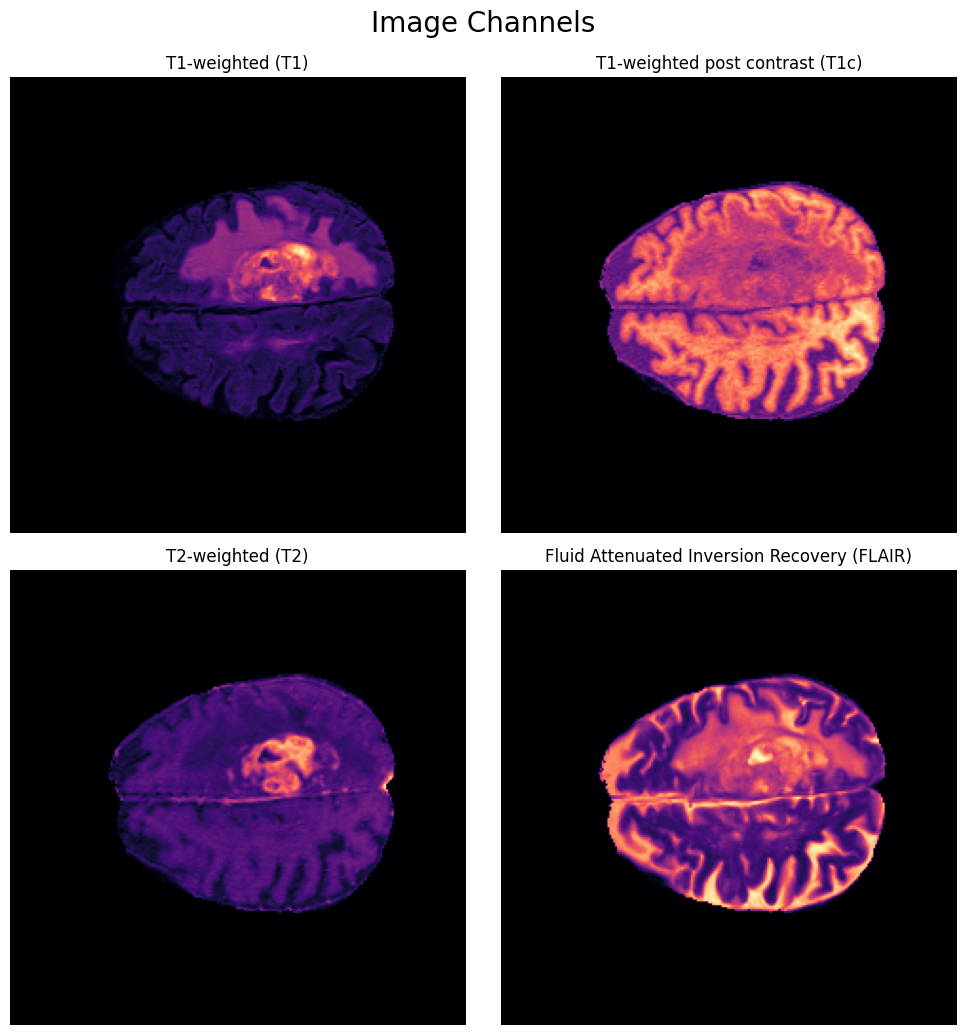

In [43]:
display_image_channels(image)

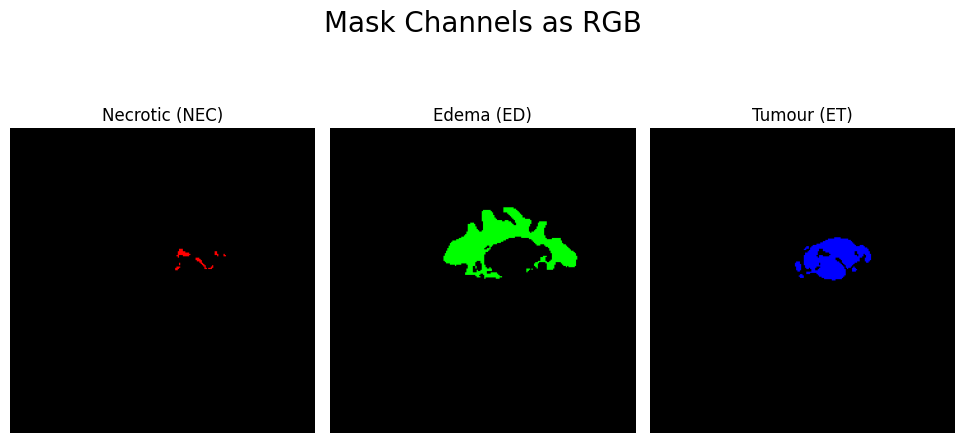

In [42]:
display_mask_channels_as_rgb(mask)

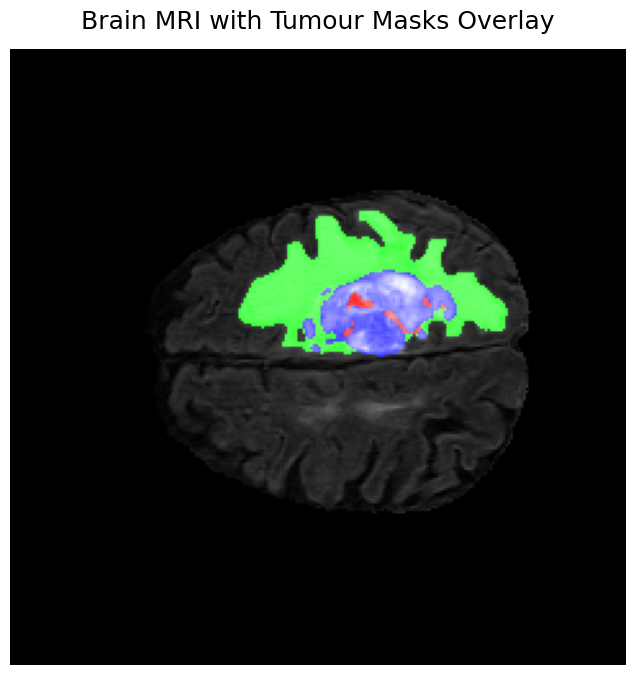

In [38]:
overlay_masks_on_image(image, mask)

In [18]:
data['image'].transpose(2, 0, 1).shape, data['mask'].transpose(2, 0, 1).shape

((4, 240, 240), (3, 240, 240))

****Loading the csv file and showing the MRI scans of one patient****

In [12]:
csv_path = "./Dataset/BraTS20 Training Metadata.csv"

In [13]:
train_df = pd.read_csv(csv_path)

In [14]:
train_df.head()

,slice_path,target,volume,slice,label0_pxl_cnt,label1_pxl_cnt,label2_pxl_cnt,background_ratio
0,../input/brats2020-training-data/BraTS2020_tra...,0,41,0,0,0,0,1.0
1,../input/brats2020-training-data/BraTS2020_tra...,0,41,1,0,0,0,1.0
2,../input/brats2020-training-data/BraTS2020_tra...,0,41,2,0,0,0,1.0
3,../input/brats2020-training-data/BraTS2020_tra...,0,41,3,0,0,0,1.0
4,../input/brats2020-training-data/BraTS2020_tra...,0,41,4,0,0,0,1.0


In [53]:
train_df['volume'].max(), train_df['volume'].min()

(369, 1)

In [62]:
train_df.iloc[5]['slice_path']

'../input/brats2020-training-data/BraTS2020_training_data/content/data/volume_41_slice_5.h5'

In [15]:
train_df[train_df['volume'] == 1]['slice_path'].values.tolist()

['../input/brats2020-training-data/BraTS2020_training_data/content/data/volume_1_slice_0.h5',
 '../input/brats2020-training-data/BraTS2020_training_data/content/data/volume_1_slice_1.h5',
 '../input/brats2020-training-data/BraTS2020_training_data/content/data/volume_1_slice_2.h5',
 '../input/brats2020-training-data/BraTS2020_training_data/content/data/volume_1_slice_3.h5',
 '../input/brats2020-training-data/BraTS2020_training_data/content/data/volume_1_slice_4.h5',
 '../input/brats2020-training-data/BraTS2020_training_data/content/data/volume_1_slice_5.h5',
 '../input/brats2020-training-data/BraTS2020_training_data/content/data/volume_1_slice_6.h5',
 '../input/brats2020-training-data/BraTS2020_training_data/content/data/volume_1_slice_7.h5',
 '../input/brats2020-training-data/BraTS2020_training_data/content/data/volume_1_slice_8.h5',
 '../input/brats2020-training-data/BraTS2020_training_data/content/data/volume_1_slice_9.h5',
 '../input/brats2020-training-data/BraTS2020_training_data/c

In [16]:
paths = train_df[train_df['volume'] == 1]['slice_path'].values.tolist()
#root = "./archive (1)/BraTS2020_training_data/content/data"
images = []
masks = []
for idx, path in enumerate(paths):
    path = './Dataset' + path[32:]

    # sample_file_path = os.path.join(root, h5_files[20070])
    
    with h5py.File(path, 'r') as file:
        # print(file['image'][()].transpose(2, 0, 1).shape)
        images.append(file['image'][()].transpose(2, 0, 1))
        masks.append(file['mask'][()].transpose(2, 0, 1))

In [17]:
len(images)

155

In [44]:
def overlay_masks_on_image(image, mask):
    t1_image = image[0, :, :]  # Use the first channel of the image
    t1_image_normalized = (t1_image - t1_image.min()) / (t1_image.max() - t1_image.min())

    rgb_image = np.stack([t1_image_normalized] * 3, axis=-1)
    color_mask = np.stack([mask[0, :, :], mask[1, :, :], mask[2, :, :]], axis=-1)
    rgb_image = np.where(color_mask, color_mask, rgb_image)
    
    return rgb_image

C:\Users\USER\AppData\Local\Temp\ipykernel_7472\1747352054.py:3: RuntimeWarning: invalid value encountered in divide
  t1_image_normalized = (t1_image - t1_image.min()) / (t1_image.max() - t1_image.min())
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\matplotlib\cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


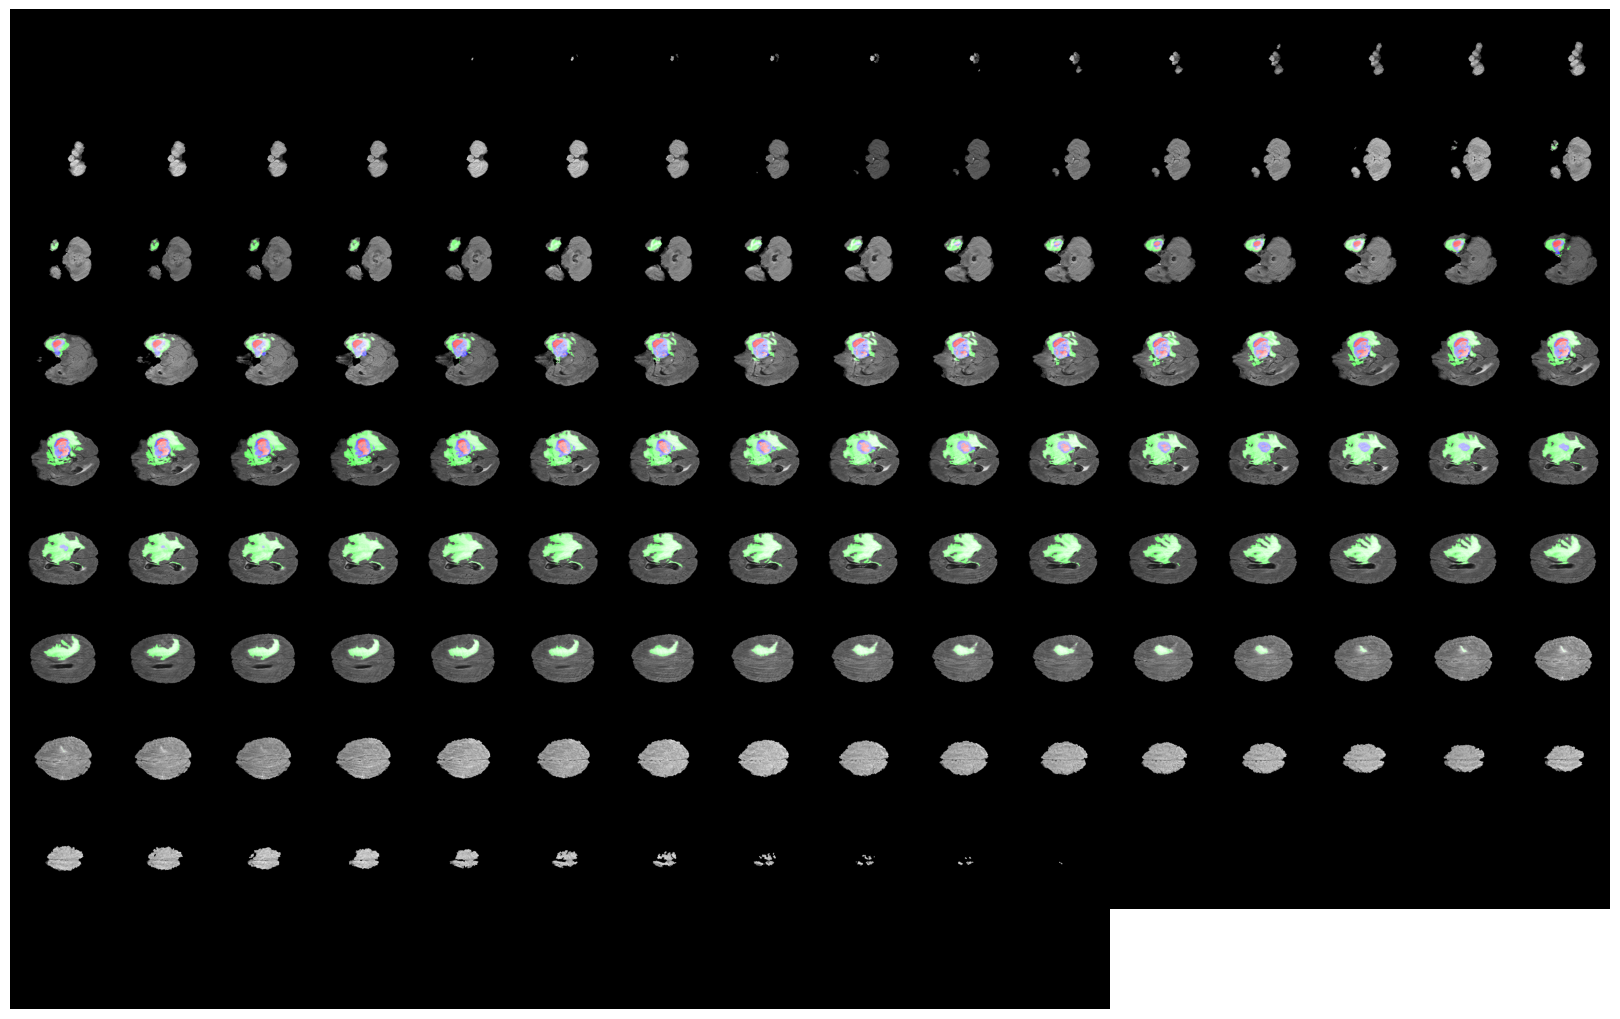

In [46]:
# Define the number of rows and columns for the grid
nrows = 10  # Adjust as necessary
ncols = 16

# Create a figure with subplots and no padding between the images
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols, nrows), gridspec_kw={'wspace': 0, 'hspace': 0})

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each array in the corresponding subplot
for i, (array, mask) in enumerate(zip(images, masks)):
    if i < len(axes):
        # axes[i].imshow(array[0, :, :], cmap='magma')  # Assuming the arrays are grayscale
        axes[i].imshow(overlay_masks_on_image(array, mask))
        axes[i].axis('off')  # Turn off the axis labels

# Remove any extra subplots that don't have an image (if the list is shorter than grid)
for ax in axes[len(images):]:
    ax.remove()

# Adjust the layout to remove padding between subplots and the figure edges
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)

# Remove any extra padding from the figure itself
plt.margins(0, 0)

# Disable the toolbar and tight layout (sometimes it adds extra padding)
plt.gcf().canvas.toolbar_visible = False
plt.tight_layout(pad=0, h_pad=0, w_pad=0)

plt.show()

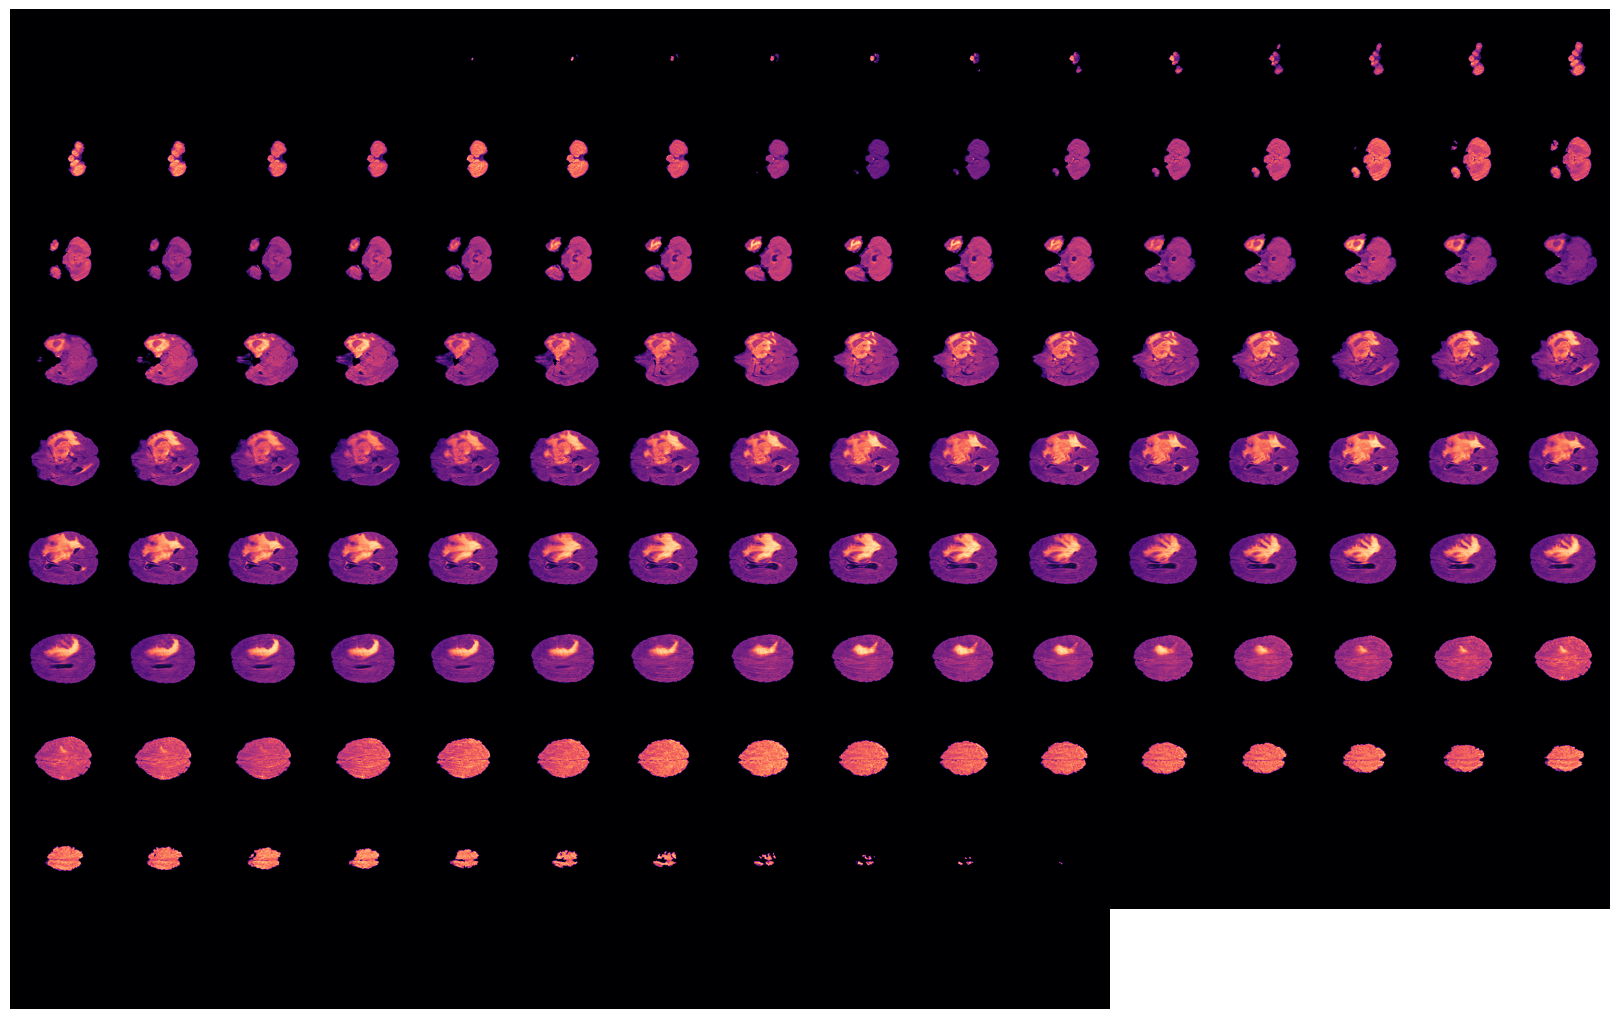

In [24]:
# Define the number of rows and columns for the grid
nrows = 10  # Adjust as necessary
ncols = 16

# Create a figure with subplots and no padding between the images
fig, axes = plt.subplots(nrows, ncols, figsize=(ncols, nrows), gridspec_kw={'wspace': 0, 'hspace': 0})

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each array in the corresponding subplot
for i, array in enumerate(images):
    if i < len(axes):
        axes[i].imshow(array[0, :, :], cmap='magma')  # Assuming the arrays are grayscale
        axes[i].axis('off')  # Turn off the axis labels

# Remove any extra subplots that don't have an image (if the list is shorter than grid)
for ax in axes[len(images):]:
    ax.remove()

# Adjust the layout to remove padding between subplots and the figure edges
plt.subplots_adjust(left=0, right=1, top=1, bottom=0, wspace=0, hspace=0)

# Remove any extra padding from the figure itself
plt.margins(0, 0)

# Disable the toolbar and tight layout (sometimes it adds extra padding)
plt.gcf().canvas.toolbar_visible = False
plt.tight_layout(pad=0, h_pad=0, w_pad=0)

plt.show()
